In [72]:
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_density, geom_histogram, labs, geom_boxplot, geom_bar, after_stat
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('playlist_features.csv')

In [74]:
#Renaming playlists
df['Playlist'].replace('Kpop girl group songs that were a cultural reset', 'Kpop-iconic', inplace=True)
df['Playlist'].replace('KPOP', 'Kpop-myselection', inplace=True)
df['Playlist'].replace('BEST KPOP 2021 - TOP HITS', 'Kpop-2021', inplace=True)
df['Playlist'].replace('lit anime music', 'Anime-myselection', inplace=True)
df['Playlist'].replace(r'Shounen Anime Vibes (Anime Opening & Ending)', 'Anime-iconic', inplace=True)

df['Preference'] = np.where(df['Playlist'].str.contains('iconic'), 'Other', 'Mine')
df['Type'] = np.where(df['Playlist'].str.contains('Kpop'), 'Kpop', 'Anime')

In [75]:
print("Null values:", df.isna().sum().sum())
df = df[df['Playlist'].str.contains('(?i)kpop')]
print("Data dimensions: ", df.shape)
df.head()

Null values: 0
Data dimensions:  (1471, 98)


,Track Name,Track ID,Artist,Track popularity,Playlist,danceability,energy,key,loudness,mode,...,otacore,power metal,progressive electro house,scorecore,shonen,symphonic rock,touken ranbu,trancecore,visual kei,vocaloid
0,Hobgoblin,2JTjDYA0vfx8sp5XMTbeqU,CLC,0.0,Kpop 2015-2021,0.621,0.873,11,-2.888,0,...,0,0,0,0,0,0,0,0,0,0
1,HELICOPTER,2hJS7BdEaH9Jo8MeJujsHT,CLC,66.0,Kpop-myselection,0.621,0.873,11,-2.888,0,...,0,0,0,0,0,0,0,0,0,0
2,Liar,67D8AmrRyahBZNKzPBBsJG,CLC,0.0,Kpop 2015-2021,0.735,0.829,6,-3.510,0,...,0,0,0,0,0,0,0,0,0,0
3,BLACK DRESS,4g73tmQQc6pSfe4NMXKrZD,CLC,56.0,Kpop-myselection,0.735,0.870,1,-1.955,1,...,0,0,0,0,0,0,0,0,0,0
4,Devil,3aG0gbuvZ1VeVm68d4J6Yq,CLC,58.0,Kpop-myselection,0.715,0.760,2,-3.353,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#Results summary
print("Number of KPOP songs - my playlist: ", len(df[df['Playlist']=='Kpop-myselection']))
print("Number of KPOP songs - iconic playlist: ", len(df[df['Playlist']=='Kpop-iconic']))
print("Number of KPOP songs - 2021: ", len(df[df['Playlist']=='Kpop-2021']))


Number of KPOP songs - my playlist:  60
Number of KPOP songs - iconic playlist:  274
Number of KPOP songs - 2021:  182


In [77]:
#Most popular kpop artists in my playlist:
Counter(df[df['Playlist']=='Kpop-myselection']['Artist']).most_common(10)

[('(G)I-DLE', 8),
 ('MAMAMOO', 8),
 ('Dreamcatcher', 7),
 ('OH MY GIRL', 6),
 ('CLC', 5),
 ('BLACKPINK', 5),
 ('AOA', 5),
 ('SUNMI', 3),
 ('Lovelyz', 2),
 ('4Minute', 1)]

In [78]:
#Shared kpop songs among playlists
set(df[df['Playlist']=='Kpop-iconic']['Track Name']).intersection(set(df[df['Playlist']=='Kpop-myselection']['Track Name']))

{'Ah-Choo',
 'Alone',
 "As If It's Your Last",
 'BBoom BBoom',
 'BLACK DRESS',
 'BOCA',
 'BOOMBAYAH',
 'Crazy',
 'DDU-DU DDU-DU',
 'Destiny',
 'Dolphin',
 'Dun Dun Dance',
 'Décalcomanie',
 'FIESTA',
 'GOOD NIGHT',
 'Gashina',
 'HELICOPTER',
 'HIP',
 'Heart Attack',
 'Hobgoblin',
 'How You Like That',
 'LATATA',
 'LION',
 'LUV',
 'Like a Cat',
 'MAGO',
 'Maria',
 'Miniskirt',
 'NUNU NANA',
 'Oh my god',
 'Secret Garden',
 'Starry Night'}

In [79]:
set(df[df['Playlist']=='Kpop-2021']['Track Name']).intersection(set(df[df['Playlist']=='Kpop-myselection']['Track Name']))

{'AYA',
 'BEAM BEAM',
 'BEcause',
 'BOCA',
 'DUMDi DUMDi',
 'Dingga',
 'Dolphin',
 'Dun Dun Dance',
 'FIESTA',
 'HELICOPTER',
 'HWAA',
 'How You Like That',
 'MAGO',
 'Maria',
 'NUNU NANA',
 'Nonstop',
 'Odd Eye',
 'Oh my god'}

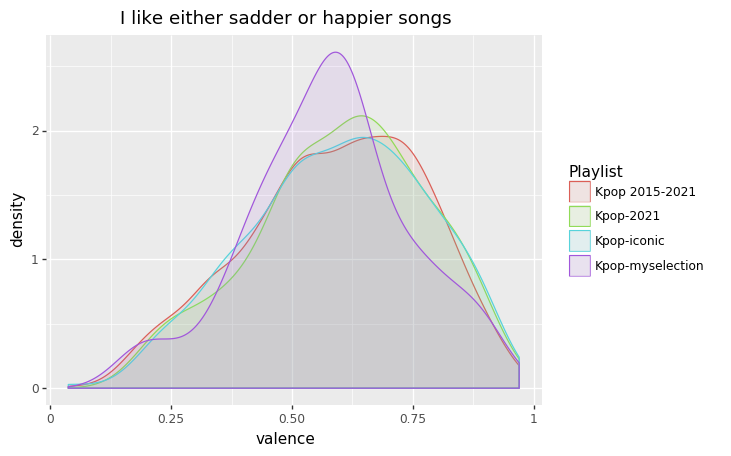

<ggplot: (-9223371861273781496)>

In [82]:
(
    ggplot(df, aes(x='valence', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I like either sadder or happier songs")
)

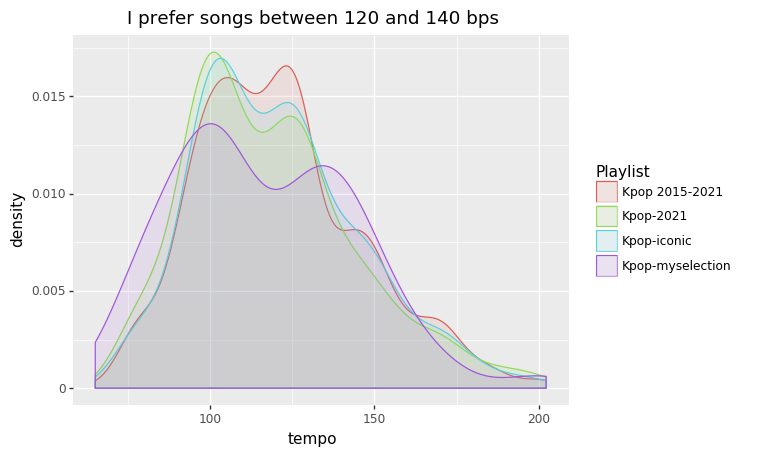

<ggplot: (-9223371861272071808)>

In [83]:
(
    ggplot(df[df['Type']=='Kpop'], aes(x='tempo', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I prefer songs between 120 and 140 bps")
)

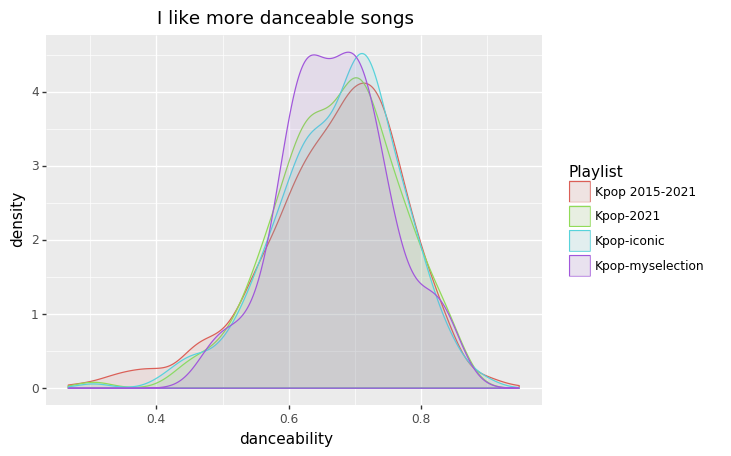

<ggplot: (-9223371861274734844)>

In [84]:
(
    ggplot(df[df['Type']=='Kpop'], aes(x='danceability', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I like more danceable songs")
)

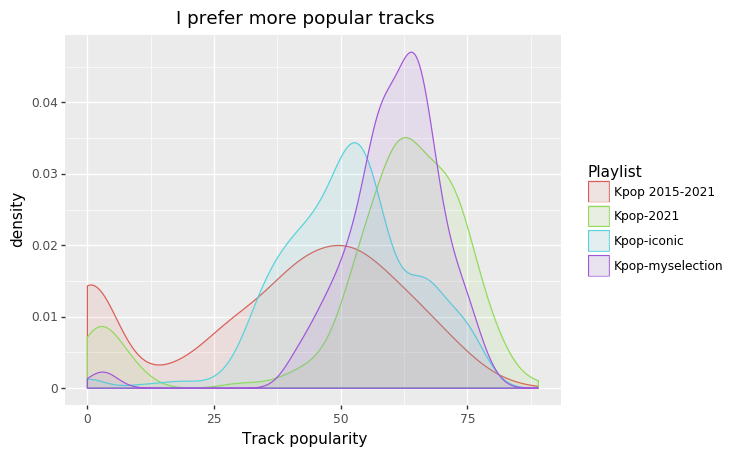

<ggplot: (-9223371861274488228)>

In [85]:
(
    ggplot(df, aes(x='Track popularity', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I prefer more popular tracks")
)

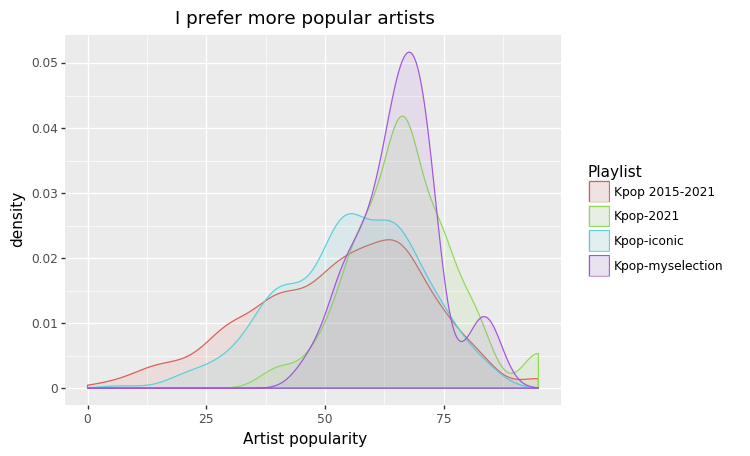

<ggplot: (-9223371861274693932)>

In [86]:
(
    ggplot(df, aes(x='Artist popularity', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I prefer more popular artists")
)

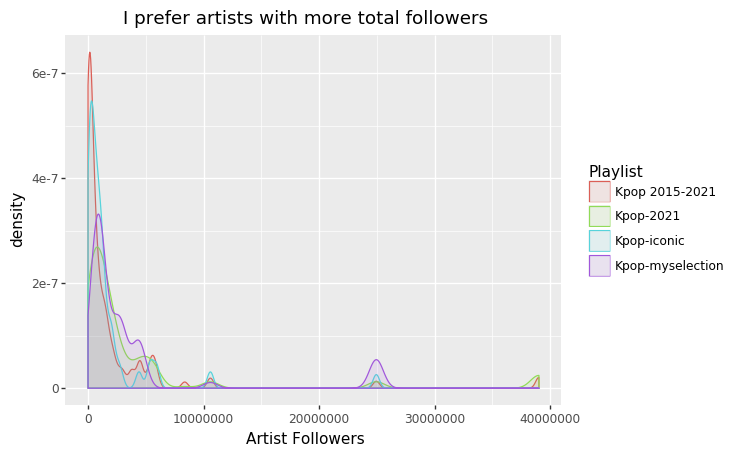

<ggplot: (-9223371861274694096)>

In [87]:
(
    ggplot(df, aes(x='Artist Followers', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I prefer artists with more total followers")
)

In [88]:
#Percentage of songs in the minor key

print(df.groupby('Playlist').sum()['mode'].loc['Kpop-2021']/len(df[df['Playlist']=='Kpop-2021'])*100)
print(df.groupby('Playlist').sum()['mode'].loc['Kpop-myselection']/len(df[df['Playlist']=='Kpop-myselection'])*100)
print(df.groupby('Playlist').sum()['mode'].loc['Kpop-iconic']/len(df[df['Playlist']=='Kpop-iconic'])*100)

40.65934065934066
41.66666666666667
45.25547445255474


In [89]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [90]:
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'Track popularity', 'Artist popularity', 'Artist Followers', 'mode']

In [96]:
t_tests = []
for feature in features:
    result = ttest_ind(df[df['Playlist'].str.contains('Kpop-iconic')][feature], df[df['Playlist'].str.contains('Kpop-my')][feature])[1]
    print(feature, result)
    t_tests.append(result)

danceability 0.8010834726812583
energy 0.1926688953721343
key 0.07695055134303079
loudness 0.12397912240720053
speechiness 0.5984850102409454
acousticness 0.4473510175137674
instrumentalness 0.2388542226846351
liveness 0.1733588155178513
valence 0.42363641270370744
tempo 0.3150437030700165
duration_ms 0.027678974283235933
Track popularity 4.670446240284414e-06
Artist popularity 1.741804701385982e-07
Artist Followers 0.0010629874532597748
mode 0.6137579169596346


In [97]:
#apply Bonferroni correction
multipletests(t_tests, method='hs')

(array([False, False, False, False, False, False, False, False, False,
        False, False,  True,  True,  True, False]),
 array([9.36396256e-01, 8.19759100e-01, 5.85547618e-01, 7.33838911e-01,
        9.36396256e-01, 9.36396256e-01, 8.51995508e-01, 8.19759100e-01,
        9.36396256e-01, 8.96729287e-01, 2.85970548e-01, 6.53842624e-05,
        2.61270387e-06, 1.37310440e-02, 9.36396256e-01]),
 0.0034137129465903193,
 0.0033333333333333335)

In [93]:
#According to classical statistics, the statistically significant difference between my playlist and an iconic kpop playlist is danceability, track popularity, artist popularity, and artist followers

In [94]:
t_tests = []
for feature in features:
    result = ttest_ind(df[df['Playlist'].str.contains('2021')][feature], df[df['Playlist'].str.contains('my')][feature])[1]
    print(feature, result)
    t_tests.append(result)

danceability 0.8572631941156181
energy 0.6617784140307554
key 0.11353091419888366
loudness 0.16504816098556754
speechiness 0.7820797238500947
acousticness 0.24147619043247792
instrumentalness 0.659536492277193
liveness 0.040925672174745104
valence 0.5217455365717625
tempo 0.26326669793087165
duration_ms 0.0005461866580040376
Track popularity 3.5523308259457017e-09
Artist popularity 5.934441711622839e-06
Artist Followers 0.07717034154114519
mode 0.40049736364971633


In [95]:
#apply Bonferroni correction
multipletests(t_tests, method='hs')

(array([False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True, False, False]),
 array([9.86563620e-01, 9.86563620e-01, 7.00335050e-01, 8.02779148e-01,
        9.86563620e-01, 8.90414337e-01, 9.86563620e-01, 3.94342369e-01,
        9.74979548e-01, 8.90414337e-01, 7.07720414e-03, 5.32849618e-08,
        8.30789792e-05, 5.86631879e-01, 9.53575570e-01]),
 0.0034137129465903193,
 0.0033333333333333335)